In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['lines.markersize'] = 15
import numpy as np

# News articles example

This example is taken from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

### Load the dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint

newsgroups_train = fetch_20newsgroups(subset='train')
pprint(list(newsgroups_train.target_names))
# dataset contains 11314 news articles in english calssified in 20 categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [3]:
print newsgroups_train.filenames.shape
print newsgroups_train.target.shape
# the target is the index of the category stored in newsgroups_train.target_names
# i.e.
# target = 7 => rec.autos
print newsgroups_train.target[:10]

(11314,)
(11314,)
[ 7  4  4  1 14 16 13  3  2  4]


In [4]:
# In the following we will restrict the DS to only 2 cathegories
#       idx = 0      , idx = 1
cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats,remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats,remove=('headers', 'footers', 'quotes'))
print list(newsgroups_train.target_names)
print newsgroups_train.filenames.shape
print newsgroups_train.target.shape
print newsgroups_train.target[:10]
print newsgroups_test.filenames.shape
print newsgroups_test.target.shape
print newsgroups_test.target[:10]
print "Number of articles about atheism:",newsgroups_train.target[newsgroups_train.target == 0 ].shape
print "Number of articles about space:",newsgroups_train.target[newsgroups_train.target == 1 ].shape
# the categories are well balanced we don't need to apply any rebalincing technique

['alt.atheism', 'sci.space']
(1073,)
(1073,)
[0 1 1 1 0 1 1 0 0 0]
(713,)
(713,)
[0 1 0 1 1 0 1 0 0 0]
Number of articles about atheism: (480,)
Number of articles about space: (593,)


In [5]:
# the articles are stored as a list in newsgroups_train.data
newsgroups_train.data[0]

u': \n: >> Please enlighten me.  How is omnipotence contradictory?\n: \n: >By definition, all that can occur in the universe is governed by the rules\n: >of nature. Thus god cannot break them. Anything that god does must be allowed\n: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts\n: >the rules of nature.\n: \n: Obviously, an omnipotent god can change the rules.\n\nWhen you say, "By definition", what exactly is being defined;\ncertainly not omnipotence. You seem to be saying that the "rules of\nnature" are pre-existant somehow, that they not only define nature but\nactually cause it. If that\'s what you mean I\'d like to hear your\nfurther thoughts on the question.'

## From text to vectors

In [6]:
# CountVectorizer is a transformer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
train_cv = cv.fit_transform(newsgroups_train.data)

print train_cv.shape
print len(cv.vocabulary_)

total_word_count = train_cv.sum(axis = 0)
print total_word_count.shape

print "Most frequent words:"
for idx in xrange(1,21):
    vocabulary_index = total_word_count.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    print "{0:10} {1:10} {2:10}".format(idx,word,total_word_count[0,vocabulary_index])

# Here all the to 20 words are not significant at all! 
# They are actually words that should be not considered

(1073, 18217)
18217
(1, 18217)
Most frequent words:
         1 the             10868
         2 of               5611
         3 to               5492
         4 and              4286
         5 is               3696
         6 in               3274
         7 that             3121
         8 it               2513
         9 for              2040
        10 you              1844
        11 be               1651
        12 are              1536
        13 this             1526
        14 on               1517
        15 not              1452
        16 as               1328
        17 have             1274
        18 or               1077
        19 but              1030
        20 space             996


In [7]:
# Removing common english words: i.e. articles
cv = CountVectorizer(stop_words='english')
train_cv = cv.fit_transform(newsgroups_train.data)
print train_cv.shape
print len(cv.vocabulary_)

total_word_count = train_cv.sum(axis = 0)
print total_word_count.shape

print "Most frequent words:"
for idx in xrange(1,21):
    vocabulary_index = total_word_count.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    print "{0:10} {1:10} {2:10}".format(idx,word,total_word_count[0,vocabulary_index])
    
# By removing the english stopwords some words in the top
# 20 starts to be significant to classify the 2 categories
# we are considering: 'alt.atheism', 'sci.space' 
# -space
# -nasa
# -god
# - ...
# but the total number of feature is still huge (17919)

(1073, 17919)
17919
(1, 17919)
Most frequent words:
         1 space             996
         2 people            472
         3 don               413
         4 god               412
         5 just              398
         6 like              384
         7 nasa              379
         8 think             348
         9 time              332
        10 does              296
        11 know              278
        12 launch            268
        13 earth             248
        14 say               224
        15 data              219
        16 new               214
        17 good              212
        18 make              212
        19 way               205
        20 orbit             203


In [8]:
# Removing words which are appearing in all documents
# or appearing only in very few documents

cv = CountVectorizer(stop_words='english',max_df = 0.9, min_df = 10)
train_cv = cv.fit_transform(newsgroups_train.data)
print train_cv.shape
print len(cv.vocabulary_)

total_word_count = train_cv.sum(axis = 0)
print total_word_count.shape

cv_top_20_words_position = {}

print "Most frequent words:"
for idx in xrange(1,51):
    vocabulary_index = total_word_count.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    print "{0:10} {1:10} {2:10}".format(idx,word,total_word_count[0,vocabulary_index])
    cv_top_20_words_position[word]=idx


# The relevant words are still in the top 20
# but the total number of features is by far reduced

(1073, 1634)
1634
(1, 1634)
Most frequent words:
         1 space             996
         2 people            472
         3 don               413
         4 god               412
         5 just              398
         6 like              384
         7 nasa              379
         8 think             348
         9 time              332
        10 does              296
        11 know              278
        12 launch            268
        13 earth             248
        14 say               224
        15 data              219
        16 new               214
        17 good              212
        18 make              212
        19 way               205
        20 orbit             203
        21 atheism           199
        22 believe           198
        23 said              196
        24 shuttle           192
        25 use               189
        26 satellite         187
        27 edu               184
        28 lunar             182
        29 years           

## The TF-IDF transformation

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

train_tfidf = tfidf.fit_transform(train_cv)
print train_tfidf.shape

total_word_tfidf = train_tfidf.sum(axis = 0)
print total_word_tfidf.shape


print "Most frequent words:"
for idx in xrange(1,51):
    vocabulary_index = total_word_tfidf.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    old_position = '-'
    if word in cv_top_20_words_position:
        old_position=str(cv_top_20_words_position[word])
    print "{0:10} {1:10} {2:10.2f} {3:10}".format(idx,word,float(total_word_tfidf[0,vocabulary_index]),old_position)



(1073, 1634)
(1, 1634)
Most frequent words:
         1 space           33.74 1         
         2 just            26.85 5         
         3 don             26.23 3         
         4 think           25.40 8         
         5 people          24.74 2         
         6 like            24.51 6         
         7 god             22.51 4         
         8 know            20.42 11        
         9 does            19.13 10        
        10 time            17.59 9         
        11 say             15.66 14        
        12 nasa            15.50 7         
        13 good            14.33 17        
        14 things          14.08 30        
        15 right           13.71 49        
        16 said            13.17 23        
        17 way             12.93 19        
        18 make            12.91 18        
        19 edu             12.90 27        
        20 long            12.72 33        
        21 did             12.45 46        
        22 ve              11.98

## Classification 

In [14]:
# Training
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', 
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=1, 
                            max_leaf_nodes=None, 
                            class_weight=None, 
                            presort=False)

dt.fit(train_tfidf,newsgroups_train.target)

score_train = dt.score(train_tfidf,newsgroups_train.target)
print "The accuracy of the model on the training set is:",score_train

The accuracy of the model on the training set is: 0.9860205032618826


In [15]:
# test
test_cv = cv.transform(newsgroups_test.data)
test_tfidf = tfidf.transform(test_cv)

score_test = dt.score(test_tfidf,newsgroups_test.target)
print "The accuracy of the model on the training set is:",score_test

The accuracy of the model on the training set is: 0.7727910238429172


## How to optimise the model and how to industrialise

### Pipeline 

In [16]:
from sklearn import pipeline

# pipelines allow you to group and manage all the steps of the analysis 
# in one object
pipe = pipeline.Pipeline([
                            ('count_vectorizer',CountVectorizer(stop_words='english',max_df = 0.9, min_df = 10)),
                            ('tf_idf',TfidfTransformer()),
                            ('model',DecisionTreeClassifier(random_state=1))
                         ])

# you can access to the object contained in each step and configure it
count_vec_object = pipe.named_steps['count_vectorizer']

# you can configure objects parameters
print pipe.get_params()['model__max_depth']
pipe.set_params(model__max_depth=10)
print pipe.get_params()['model__max_depth']
pipe.set_params(model__max_depth=None)

None
10


Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.9, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words='en...         min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'))])

In [17]:
pipe = pipe.fit(newsgroups_train.data,newsgroups_train.target)
score_train_pipe = pipe.score(newsgroups_train.data,newsgroups_train.target)
score_test_pipe = pipe.score(newsgroups_test.data,newsgroups_test.target)
print "new training score is:",score_train_pipe
print "new test score is:",score_test_pipe

new training score is: 0.9860205032618826
new test score is: 0.7727910238429172


### Parameter optimisation: Grid Search 

In [19]:
from sklearn.model_selection import GridSearchCV
from pandas import DataFrame

gs = GridSearchCV(
                    pipe,
                    {
                        "count_vectorizer__min_df": range(1,10)+range(10,30,5),
                        "model__max_depth": range(1,20)+range(30,100,10)
                    },
                    cv=2,  # 5-fold cross validation
                    n_jobs=-1,  # run each hyperparameter in one of two parallel jobs
                    scoring="accuracy" # what could happen selecting "precision" as scoring measure?
                )

gs.fit(newsgroups_train.data,newsgroups_train.target)

print gs.best_params_
results = DataFrame(data = gs.cv_results_)
results.head(10)

{'count_vectorizer__min_df': 1, 'model__max_depth': 19}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_count_vectorizer__min_df,param_model__max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.218727,0.180340,0.637465,0.643061,1,1,"{u'count_vectorizer__min_df': 1, u'model__max_...",321,0.631285,0.647388,0.643657,0.638734,0.014203,0.004752,0.006186,0.004327
1,0.233582,0.176044,0.628145,0.654251,1,2,"{u'count_vectorizer__min_df': 1, u'model__max_...",334,0.612663,0.666045,0.643657,0.642458,0.000223,0.007286,0.015497,0.011793
2,0.248084,0.180127,0.649581,0.707385,1,3,"{u'count_vectorizer__min_df': 1, u'model__max_...",297,0.636872,0.731343,0.662313,0.683426,0.006242,0.009773,0.012721,0.023958
3,0.250110,0.180609,0.648649,0.724176,1,4,"{u'count_vectorizer__min_df': 1, u'model__max_...",298,0.635009,0.764925,0.662313,0.683426,0.005199,0.008435,0.013652,0.040749
4,0.261284,0.179659,0.657968,0.742803,1,5,"{u'count_vectorizer__min_df': 1, u'model__max_...",284,0.635009,0.770522,0.680970,0.715084,0.003246,0.008235,0.022980,0.027719
5,0.253207,0.176831,0.670084,0.764236,1,6,"{u'count_vectorizer__min_df': 1, u'model__max_...",261,0.640596,0.789179,0.699627,0.739292,0.002164,0.007995,0.029515,0.024943
6,0.253124,0.178224,0.675676,0.771698,1,7,"{u'count_vectorizer__min_df': 1, u'model__max_...",249,0.651769,0.804104,0.699627,0.739292,0.007576,0.007652,0.023929,0.032406
7,0.250132,0.179036,0.706431,0.786608,1,8,"{u'count_vectorizer__min_df': 1, u'model__max_...",197,0.666667,0.817164,0.746269,0.756052,0.006973,0.007078,0.039801,0.030556
8,0.278121,0.179761,0.718546,0.803378,1,9,"{u'count_vectorizer__min_df': 1, u'model__max_...",147,0.674115,0.828358,0.763060,0.778399,0.008955,0.008378,0.044472,0.024980
9,0.264896,0.179096,0.720410,0.810838,1,10,"{u'count_vectorizer__min_df': 1, u'model__max_...",139,0.677840,0.839552,0.763060,0.782123,0.008760,0.007973,0.042610,0.028715


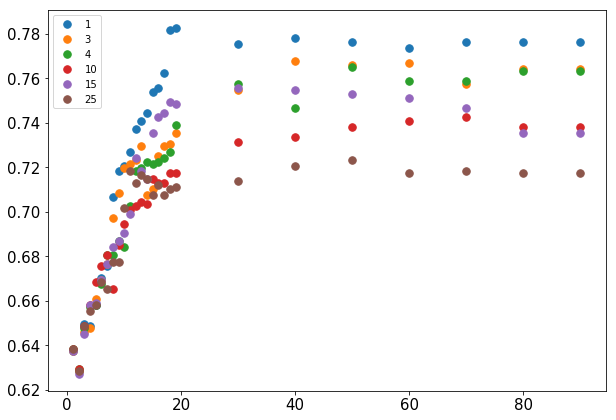

In [20]:

for idx,mdf in enumerate([1,3,4,10,15,25]):
    x = results[results['param_count_vectorizer__min_df']==mdf]['param_model__max_depth']
    y = results[results['param_count_vectorizer__min_df']==mdf]['mean_test_score']

    plt.plot(x,y,'.',label='{0}'.format(mdf))

plt.legend()

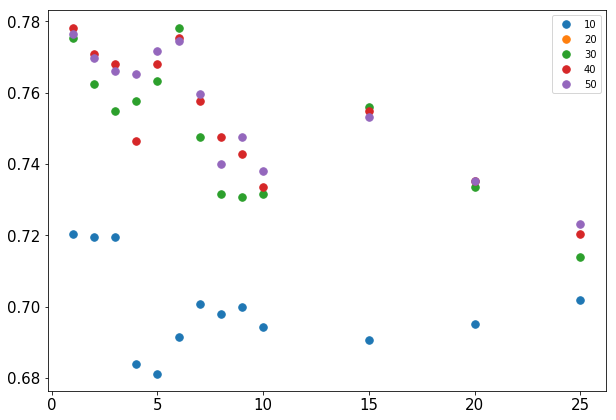

In [21]:
for idx,depth in enumerate([10,20,30,40,50]):
    x = results[results['param_model__max_depth']==depth]['param_count_vectorizer__min_df']
    y = results[results['param_model__max_depth']==depth]['mean_test_score']

    plt.plot(x,y,'.',label='{0}'.format(depth))

plt.legend()


In [22]:
pipe.set_params(model__max_depth=60,count_vectorizer__min_df=1)
pipe = pipe.fit(newsgroups_train.data,newsgroups_train.target)

score_test = pipe.score(newsgroups_test.data,newsgroups_test.target)
score_train = pipe.score(newsgroups_train.data,newsgroups_train.target)

print "Training score",score_train
print "Test score",score_test

Training score 0.9822926374650512
Test score 0.7812061711079944


In [23]:
for idx in xrange(1,51):
    vocabulary_index = pipe.named_steps['model'].feature_importances_.argsort(axis=0)[-1*idx]
    relevance = pipe.named_steps['model'].feature_importances_[vocabulary_index]
    word = pipe.named_steps['count_vectorizer'].get_feature_names()[vocabulary_index]
    
    print "{0:10} - {1:10}{2:10}".format(idx,word,relevance)

         1 - space     0.198765067842
         2 - god       0.0911538477779
         3 - religion  0.0488623030489
         4 - orbit     0.032935769761
         5 - nasa      0.02822352499
         6 - people    0.025659909952
         7 - like      0.0254729279709
         8 - morality  0.0238706002653
         9 - bobby     0.0207441386666
        10 - high      0.0161890443811
        11 - argument  0.0159206355849
        12 - launch    0.0150566849727
        13 - right     0.0133194470459
        14 - islamic   0.0128183832637
        15 - post      0.0121948769423
        16 - religious 0.0118596488793
        17 - bible     0.0112754297227
        18 - wrong     0.0112742566566
        19 - stay      0.0112116150148
        20 - cruel     0.0109071717865
        21 - agree     0.010887063121
        22 - got       0.0106098718589
        23 - objective 0.0104708849151
        24 - ve        0.0104250126967
        25 - bit       0.0100298595563
        26 - aren      0.008818

In [24]:
# to understand
cats = ['sci.space']
newsgroups_space = fetch_20newsgroups(subset='train', categories=cats,remove=('headers', 'footers', 'quotes'))
print len(newsgroups_space.data)

593


In [25]:
cv_ds = pipe.named_steps['count_vectorizer'].transform(newsgroups_space.data)
space_idx = pipe.named_steps['count_vectorizer'].vocabulary_['space']

entry_where_space_is_present = cv_ds[cv_ds[:,space_idx]>0]
print entry_where_space_is_present.shape

(1, 214)
